<a href="https://colab.research.google.com/github/jisoolee11/Deep-Learning/blob/main/DeepLearning%20for%20everyone/prediting_pima_indian_diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>피마 인디언의 당뇨병 예측하기</h1>

-피마인디언: https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/pima-indians-diabetes.csv


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pima-indians-diabetes.csv', names= ['pregnant', 'plasma', 'pressur', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
print(df.head())

   pregnant  plasma  pressur  thickness  insulin   BMI  pedigree  age  class
0         6     148       72         35        0  33.6     0.627   50      1
1         1      85       66         29        0  26.6     0.351   31      0
2         8     183       64          0        0  23.3     0.672   32      1
3         1      89       66         23       94  28.1     0.167   21      0
4         0     137       40         35      168  43.1     2.288   33      1


In [11]:
# 임신 횟수와 당뇨병 발병의 관계
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending='True'))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


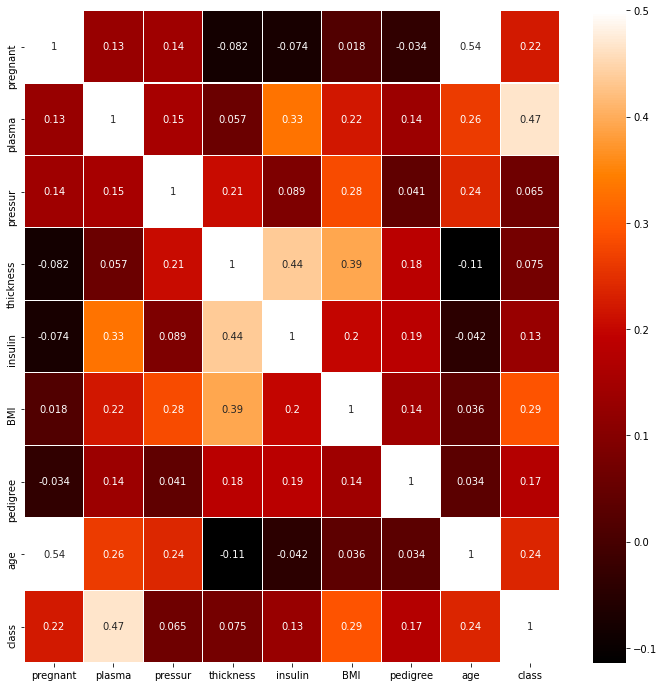

In [13]:
# 그래프로 보는 한목 간의 상관관계
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

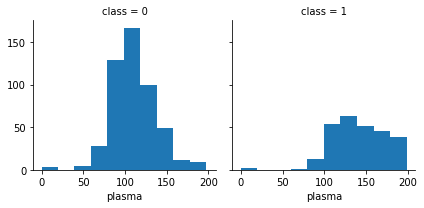

In [14]:
# plasma와 class의 관계
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [15]:
# seed값 생성
numpy.random.seed(3)
tf.random.set_seed(3)

In [16]:
# 데이터 로드
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [17]:
# 모델의 설정
model = Sequential()
model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 1s 997us/step - loss: 12.0693 - accuracy: 0.6273
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 5.7426 - accuracy: 0.6227
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 3.2875 - accuracy: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 1.6549 - accuracy: 0.5589
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8960 - accuracy: 0.4802
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8696 - accuracy: 0.5314
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7652 - accuracy: 0.6588
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7709 - accuracy: 0.6785
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6699
Epoch 